## What are the effects of pupil and behavior on neuronal activity in A1?

1) Active vs Passive -- do we see a change in gain? -- Bar plot with distributions (similar to previous plots) for AC and IC

2) Pre-passive vs post-passives -- do we see a change there? Motivation for what comes next. -- Bar plot as well? for AC and IC

3) Pupil diameter -- how much does pupil change explain A/P change? -- examples and explained variance all data plot for AC and IC. For this we used both Modulation Indexes (MI) and cross-val R2. 

4) Per trial performance -- FAR+Hits=large pupil and Misses=small pupil, we would expect adding per trial performance to contribute to better model predictions, but we saw no improvement

5) Smoothed performance -- same question as 4) but different way of addressing it by smoothing animal performance over a minute time window -- small effect that indicate no interaction between pupil effect and animal's averaged performance -- not sure what's best way to show this

6) Urgency -- does animal's thirstiness/motivation to lick affect modulations? lick rate -- OPEN QUESTION

* MIbeh = behavior only (no pupil, ie, pupil shuffled), or R2beh for variance explained  
* MIbeh-unique = behavior unique (‘minus pupil’)  
* MIpup-unique = pupil unique (‘minus behavior’)  
* R2common = ambiguous pupil or behavior   
* R20 = performance of null model (pup and beh shuffled)  

In [91]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import statsmodels.formula.api as smf
import matplotlib.collections as clt
import re
import pylab as pl
from nems_lbhb.pupil_behavior_scripts.mod_per_state import get_model_results_per_state_model

%matplotlib inline
os.getcwd()

color_ba = '#82418B' #dark purple 
color_p = '#2E7E3E' #dark green
color_bpas = '#D199C4' #light purple

savefigs = True
figs_dir = '/Users/daniela/Documents/2018/AC_IC_project_2018/Task_engagement_pupil_paper/figures'
path=os.getcwd()
path

'/Users/daniela/Documents/2018/AC_IC_project_2018/from_auto_daniela'

## 1) Does task engagement (ignoring pupil) modulate neuronal activity in AC and IC? 

### a) A1 307 MUA + SUA results 

In [92]:
# A1 SUA+MUA: pup vs. beh 307 per state dataframe
d_pb307 = pd.read_csv('d_pb_307_new.csv')
d_pb307 = d_pb307.drop(['Unnamed: 0'], axis=1)
# Add column with R2 for variance analysis
d_pb307['R2'] = d_pb307['r']**2

In [93]:
# Every cell has multiple rows for each state model
d_pb307.head()

,cellid,modelname,state_sig,state_chan,MI,r,r_se,d,g,R2
0,BRT026c-07-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,baseline,NaN,0.424528,0.021797,1.096463,0.932156,0.180224
1,BRT026c-07-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,pupil,-0.000861,0.424528,0.021797,-0.012168,-0.018089,0.180224
2,BRT026c-07-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,active,0.000680,0.424528,0.021797,0.014839,0.074780,0.180224
3,BRT026c-05-2,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,baseline,NaN,0.436652,0.020546,1.506674,0.991322,0.190665
4,BRT026c-05-2,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,pupil,-0.003393,0.436652,0.020546,-0.006919,0.008208,0.190665


In [94]:
# Check out an example
d_pb307.loc[d_pb307['cellid']=='BRT037b-63-1']

,cellid,modelname,state_sig,state_chan,MI,r,r_se,d,g,R2
81,BRT037b-63-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,baseline,NaN,0.743709,0.018425,2.984925,0.974676,0.553102
82,BRT037b-63-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,pupil,0.000369,0.743709,0.018425,-0.002090,-0.001492,0.553102
83,BRT037b-63-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,active,-0.000338,0.743709,0.018425,0.058896,0.033358,0.553102
591,BRT037b-63-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_stat...,st.pup0.beh,baseline,NaN,0.744072,0.019048,2.978533,0.978024,0.553643
592,BRT037b-63-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_stat...,st.pup0.beh,pupil,0.008893,0.744072,0.019048,-0.002478,-0.001748,0.553643
593,BRT037b-63-1,psth.fs20.pup-ld-st.pup0.beh-ref-psthfr.s_stat...,st.pup0.beh,active,0.017796,0.744072,0.019048,0.127374,0.054849,0.553643
960,BRT037b-63-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,baseline,NaN,0.743838,0.018794,2.987595,0.975063,0.553296
961,BRT037b-63-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,pupil,0.014160,0.743838,0.018794,0.046450,0.007175,0.553296
962,BRT037b-63-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,active,0.006886,0.743838,0.018794,0.058179,0.032514,0.553296
1320,BRT037b-63-1,psth.fs20.pup-ld-st.pup.beh-ref-psthfr.s_state...,st.pup.beh,baseline,NaN,0.743903,0.019168,2.987447,0.975693,0.553392


### Let's extract data for the plot of MI behavior only  
`MIbeh = MIpup0beh-MIpup0beh0`

In [95]:
# partial model pupil shuffled
d_p0b307 = d_pb307[d_pb307['state_sig']=='st.pup0.beh']

# null model pupil and behavior shuffled
d_p0b0307 = d_pb307[d_pb307['state_sig']=='st.pup0.beh0']
d_p0b0307.head()

,cellid,modelname,state_sig,state_chan,MI,r,r_se,d,g,R2
0,BRT026c-07-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,baseline,NaN,0.424528,0.021797,1.096463,0.932156,0.180224
1,BRT026c-07-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,pupil,-0.000861,0.424528,0.021797,-0.012168,-0.018089,0.180224
2,BRT026c-07-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,active,0.000680,0.424528,0.021797,0.014839,0.074780,0.180224
3,BRT026c-05-2,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,baseline,NaN,0.436652,0.020546,1.506674,0.991322,0.190665
4,BRT026c-05-2,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,pupil,-0.003393,0.436652,0.020546,-0.006919,0.008208,0.190665


In [96]:
# pivot the partial model to have MI for each state_chan
d_p0b307_MI = d_p0b307.pivot(index='cellid', columns='state_chan', values='MI')

#drop pupil and baseline columns
d_p0b307_MI = d_p0b307_MI.drop(["baseline", "pupil"], axis=1)

# pivot the null model dataframe
d_p0b0307_MI = d_p0b0307.pivot(index='cellid', columns='state_chan', values='MI')

#drop pupil and baseline columns
d_p0b0307_MI = d_p0b0307_MI.drop(["baseline", "pupil"], axis=1)

#change name of column to prepare for merging
d_p0b0307_MI = d_p0b0307_MI.rename(index=str, columns={"active":"active0"})

In [11]:
#reset index to get rid of multindexing in the partial model
d_p0b307_MI = d_p0b307_MI.reset_index()
d_p0b307_MI.head()

state_chan,cellid,active
0,BRT026c-02-1,-0.068718
1,BRT026c-02-2,0.049225
2,BRT026c-05-1,0.215102
3,BRT026c-05-2,0.164100
4,BRT026c-07-1,0.241293


In [12]:
#reset index to get rid of multindexing in the null model
d_p0b0307_MI = d_p0b0307_MI.reset_index()
d_p0b0307_MI.head()

state_chan,cellid,active0
0,BRT026c-02-1,-0.001699
1,BRT026c-02-2,0.002597
2,BRT026c-05-1,-0.000782
3,BRT026c-05-2,-0.000849
4,BRT026c-07-1,0.000680


In [13]:
# join dataframes
d307_MI_beh_only = pd.merge(d_p0b307_MI, d_p0b0307_MI, how='left', on='cellid')

# add column called beh_only with difference between active and active0
d307_MI_beh_only['MI_beh_only']=d307_MI_beh_only['active']-d307_MI_beh_only['active0']

# set the index back to cellid to apply the loc method and get the significant cells
d307_MI_beh_only=d307_MI_beh_only.set_index('cellid')
d307_MI_beh_only.head()

state_chan,active,active0,MI_beh_only
cellid,,,
BRT026c-02-1,-0.068718,-0.001699,-0.067019
BRT026c-02-2,0.049225,0.002597,0.046628
BRT026c-05-1,0.215102,-0.000782,0.215885
BRT026c-05-2,0.164100,-0.000849,0.164949
BRT026c-07-1,0.241293,0.000680,0.240614


In [177]:
# On the data frame pivoted on MI, apply the sign cells mask, and voila!
d307_MI_beh_only_sig = d307_MI_beh_only.loc[cellid_sig_307]
d307_MI_beh_only_sig.head()

state_chan,active,active0,MI_beh_only
cellid,,,
BRT026c-05-2,0.164100,-0.000849,0.164949
BRT026c-07-1,0.241293,0.000680,0.240614
BRT026c-15-1,0.247361,-0.000530,0.247891
BRT026c-17-1,0.304314,0.000828,0.303486
BRT026c-19-1,0.432244,-0.000525,0.432769


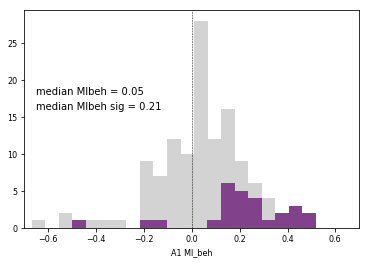

In [97]:
# histogram of MIbeh = MIpup0beh-MIpup0beh0 MI for behavior channel with pupil shuffled corrected
median_d307_MI_beh_only=d307_MI_beh_only['MI_active_only'].median()

median_d307_MI_beh_only_sig = d307_MI_beh_only_sig['MI_active_only'].median()

dist307_MI_beh_only = sns.distplot(d307_MI_beh_only['MI_active_only'], 
                       hist_kws= {'alpha':1, 'color': 'lightgrey'}, kde=False, bins=21)

dist307_MI_beh_only_sig = sns.distplot(d307_MI_beh_only_sig['MI_active_only'], 
                           hist_kws= {'alpha':1, 'color': color_ba}, kde=False, bins=18)

plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.xlim(-0.7, 0.7)

# change it so that the value of mean MI gets inserted not hard coded.
dist307_MI_beh_only.text(-0.65,18, "median MIbeh = {:0.2f}".format(median_d307_MI_beh_only), horizontalalignment='left', 
                         size='medium', color='k')
dist307_MI_beh_only.text(-0.65,16, "median MIbeh sig = {:0.2f}".format(median_d307_MI_beh_only_sig), 
                         horizontalalignment='left', size='medium', color='k')

plt.xlabel('A1 MI_beh')
plt.savefig("A1_MI_beh_dist.pdf")

Now let's do the same for the plot of MI behavior unique  
`MIunique = MIpupbeh - MIpupbeh0`

In [16]:
# full model
d_pb307_full = d_pb307[d_pb307['state_sig']=='st.pup.beh']

# partial model behavior shuffled
d_pb0307 = d_pb307[d_pb307['state_sig']=='st.pup.beh0']
d_pb0307.head()

,cellid,modelname,state_sig,state_chan,MI,r,r_se,d,g,R2
756,BRT026c-15-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,baseline,NaN,0.618576,0.019510,0.258390,1.090098,0.382636
757,BRT026c-15-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,pupil,0.157054,0.618576,0.019510,0.047437,0.145302,0.382636
758,BRT026c-15-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,active,0.164760,0.618576,0.019510,0.024420,-0.111371,0.382636
759,BRT026c-07-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,baseline,NaN,0.460757,0.021652,1.103818,0.920766,0.212297
760,BRT026c-07-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,pupil,0.119452,0.460757,0.021652,0.147556,0.093962,0.212297


In [17]:
# pivot the full model to have MI for each state_chan
d_pb307_MI = d_pb307_full.pivot(index='cellid', columns='state_chan', values='MI')

#drop pupil and baseline columns
d_pb307_MI = d_pb307_MI.drop(["baseline", "pupil"], axis=1)

# pivot the partial model dataframe
d_pb0307_MI = d_pb0307.pivot(index='cellid', columns='state_chan', values='MI')

#drop pupil and baseline columns
d_pb0307_MI = d_pb0307_MI.drop(["baseline", "pupil"], axis=1)

#change name of column to prepare for merging
d_pb0307_MI = d_pb0307_MI.rename(index=str, columns={"active":"active0"})

In [18]:
#reset index to get rid of multindexing in the full model
d_pb307_MI = d_pb307_MI.reset_index()
d_pb307_MI.head()

state_chan,cellid,active
0,BRT026c-02-1,-0.068798
1,BRT026c-02-2,0.049350
2,BRT026c-05-1,0.215491
3,BRT026c-05-2,0.164066
4,BRT026c-07-1,0.241020


In [19]:
#reset index to get rid of multindexing in the partial model
d_pb0307_MI = d_pb0307_MI.reset_index()
d_pb0307_MI.head()

state_chan,cellid,active0
0,BRT026c-02-1,0.011056
1,BRT026c-02-2,0.063707
2,BRT026c-05-1,0.134036
3,BRT026c-05-2,0.084233
4,BRT026c-07-1,0.093719


In [20]:
# join dataframes
d307_MI_beh_unique = pd.merge(d_pb307_MI, d_pb0307_MI, how='left', on='cellid')

# add column called beh_only with difference between active and active0
d307_MI_beh_unique['MI_beh_unique']=d307_MI_beh_unique['active']-d307_MI_beh_unique['active0']

# set the index back to cellid to apply the loc method and get the significant cells
d307_MI_beh_unique=d307_MI_beh_unique.set_index('cellid')

In [21]:
# On the data frame pivoted on MI, apply the sign cells mask, and voila!
d307_MI_beh_unique_sig = d307_MI_beh_unique.loc[cellid_sig_307]

0.019256831040760862
0.13058952971242993


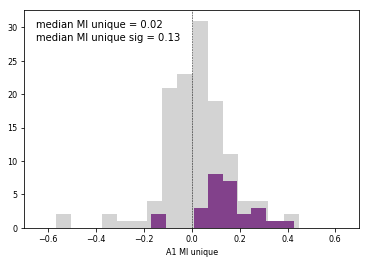

In [159]:
# histogram of MIbeh_unique = MIpupbeh - MIpupbeh0, MI for behavior only component

median_d307_MI_beh_unique = d307_MI_beh_unique['MI_beh_unique'].median()
print(median_d307_MI_beh_unique)

median_d307_MI_beh_unique_sig = d307_MI_beh_unique_sig['MI_beh_unique'].median()
print(median_d307_MI_beh_unique_sig)

dist307_MI_beh_unique = sns.distplot(d307_MI_beh_unique['MI_beh_unique'], 
                                  hist_kws= {'alpha':1, 'color': 'lightgrey'}, kde=False, 
                                     bins=16)

dist307_MI_beh_unique_sig = sns.distplot(d307_MI_beh_unique_sig['MI_beh_unique'], 
                                      hist_kws= {'alpha':1, 'color': color_ba}, kde=False, 
                                         bins=10)

plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.xlim(-0.7, 0.7)

# change it so that the value of mean MI gets inserted not hard coded.
dist307_MI_beh_unique.text(-0.65,30, "median MI unique = 0.02", 
                        horizontalalignment='left', size='medium', color='k')
dist307_MI_beh_unique.text(-0.65,28, "median MI unique sig = 0.13", 
                        horizontalalignment='left', size='medium', color='k')

plt.xlabel('A1 MI unique')

plt.savefig("A1_MI_beh_unique_dist.pdf")

### Scatter plot of MIbeh (MIpup0beh - MIpup0beh0) vs MIbeh unique (= MIpupbeh - MIpupbeh0)

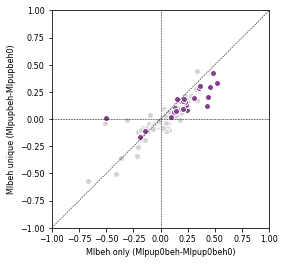

In [23]:
fig, ax = plt.subplots()

# plot
ax.scatter(d307_MI_beh_only['MI_beh_only'], d307_MI_beh_unique['MI_beh_unique'], 
           color='lightgrey', edgecolors='white')

ax.scatter(d307_MI_beh_only_sig['MI_beh_only'], d307_MI_beh_unique_sig['MI_beh_unique'], 
           color=color_ba, edgecolors='white')

ax.set_xlabel('MIbeh only (MIpup0beh-MIpup0beh0)')
ax.set_ylabel('MIbeh unique (MIpupbeh-MIpupbeh0)')
ax.set_aspect('equal')

# set the limits
plt.ylim(-1, 1)
plt.xlim(-1, 1)

# need a slope and c to fix the position of line
slope = 1
c = -1

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
ax.set_xlim([x_min, x_max])

# add horizontal line
slope = 0
c = 0

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
ax.set_xlim([x_min, x_max])

# add vertical line
xposition = 0.00
plt.axvline(x=xposition, color='k', linestyle='--', linewidth=0.5)

plt.savefig("A1_MIbeh_scatterplot.pdf")

### Calculate MIpup_unique

### Scatter plot of R2beh (R2pup0beh - R2pup0beh0) vs R2beh unique (R2pupbeh - R2pupbeh0)

In [24]:
# pivot the partial model to have R2 for each state_chan
d_p0b307_R2 = d_p0b307.pivot(index='cellid', columns='state_chan', values='R2')

#drop pupil and baseline columns
d_p0b307_R2 = d_p0b307_R2.drop(["baseline", "pupil"], axis=1)

# pivot the null model dataframe
d_p0b0307_R2 = d_p0b0307.pivot(index='cellid', columns='state_chan', values='R2')

#drop pupil and baseline columns
d_p0b0307_R2 = d_p0b0307_R2.drop(["baseline", "pupil"], axis=1)

#change name of column to prepare for merging
d_p0b0307_R2 = d_p0b0307_R2.rename(index=str, columns={"active":"active0"})

In [25]:
# pivot the full model to have R2 for each state_chan
d_pb307_R2 = d_pb307_full.pivot(index='cellid', columns='state_chan', values='R2')

#drop pupil and baseline columns
d_pb307_R2 = d_pb307_R2.drop(["baseline", "pupil"], axis=1)

# pivot the partial model dataframe
d_pb0307_R2 = d_pb0307.pivot(index='cellid', columns='state_chan', values='R2')

#drop pupil and baseline columns
d_pb0307_R2 = d_pb0307_R2.drop(["baseline", "pupil"], axis=1)

#change name of column to prepare for merging
d_pb0307_R2 = d_pb0307_R2.rename(index=str, columns={"active":"active0"})

In [26]:
#reset index to get rid of multindexing in the partial model
d_p0b307_R2 = d_p0b307_R2.reset_index()

#reset index to get rid of multindexing in the null model
d_p0b0307_R2 = d_p0b0307_R2.reset_index()

#reset index to get rid of multindexing in the full model
d_pb307_R2 = d_pb307_R2.reset_index()

#reset index to get rid of multindexing in the partial model
d_pb0307_R2 = d_pb0307_R2.reset_index()
d_pb0307_R2.head()

state_chan,cellid,active0
0,BRT026c-02-1,0.137154
1,BRT026c-02-2,0.227354
2,BRT026c-05-1,0.271259
3,BRT026c-05-2,0.253276
4,BRT026c-07-1,0.212297


In [27]:
# join partial and null dataframes
d307_R2_beh_only = pd.merge(d_p0b307_R2, d_p0b0307_R2, how='left', on='cellid')

# add column called beh_only with difference between active and active0
d307_R2_beh_only['R2_beh_only']=d307_R2_beh_only['active']-d307_R2_beh_only['active0']

# set the index back to cellid to apply the loc method and get the significant cells
d307_R2_beh_only=d307_R2_beh_only.set_index('cellid')


# join full and partial dataframes
d307_R2_beh_unique = pd.merge(d_pb307_R2, d_pb0307_R2, how='left', on='cellid')

# add column called beh_only with difference between active and active0
d307_R2_beh_unique['R2_beh_unique']=d307_R2_beh_unique['active']-d307_R2_beh_unique['active0']

# set the index back to cellid to apply the loc method and get the significant cells
d307_R2_beh_unique=d307_R2_beh_unique.set_index('cellid')


In [28]:
d307_R2_beh_unique[d307_R2_beh_unique['R2_beh_unique']>0.1]

state_chan,active,active0,R2_beh_unique
cellid,,,
TAR010c-27-2,0.304352,0.200429,0.103923


In [29]:
# On the data frame pivoted on MI, apply the sign cells mask, and voila!
d307_R2_beh_only_sig = d307_R2_beh_only.loc[cellid_sig_307]

# On the data frame pivoted on MI, apply the sign cells mask, and voila!
d307_R2_beh_unique_sig = d307_R2_beh_unique.loc[cellid_sig_307]

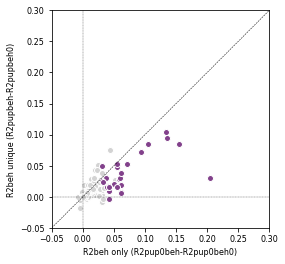

In [105]:
fig, ax = plt.subplots()

plt.ylim(-0.05, 0.3)
plt.xlim(-0.05, 0.3)

plt.axhline(0, linestyle='--', linewidth=0.3, color='k')
plt.axvline(0, linestyle='--', linewidth=0.3, color='k')
plt.plot([-0.05,0.3],[-0.05, 0.3], linestyle='--',linewidth=0.5, color='k')

ax.scatter(d307_R2_beh_only['R2_beh_only'], d307_R2_beh_unique['R2_beh_unique'], 
           color='lightgrey', edgecolors='white')

ax.scatter(d307_R2_beh_only_sig['R2_beh_only'], d307_R2_beh_unique_sig['R2_beh_unique'], 
           color=color_ba, edgecolors='white')

ax.set_xlabel('R2beh only (R2pup0beh-R2pup0beh0)')
ax.set_ylabel('R2beh unique (R2pupbeh-R2pupbeh0)')
ax.set_aspect('equal')

plt.savefig("A1_R2beh_scatterplot.pdf")

### b) IC 309 MUA + SUA results 

In [31]:
# IC SUA+MUA: pup vs. beh 309 per state dataframe
d_pb309 = pd.read_csv('d_pb_per_state_309.csv')
d_pb309 = d_pb309.drop(['Unnamed: 0'], axis=1)

# Add column with R2 for variance analysis
d_pb309['R2'] = d_pb309['r']**2

In [32]:
d_pb309.head()

,cellid,modelname,state_sig,state_chan,MI,r,r_se,d,g,R2
0,ley046g-39-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,baseline,NaN,0.264285,0.027811,3.774779,1.017438,0.069846
1,ley046g-39-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,pupil,0.000153,0.264285,0.027811,-0.005980,-0.029446,0.069846
2,ley046g-39-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,active,-0.000200,0.264285,0.027811,0.015825,-0.026386,0.069846
3,ley046g-59-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,baseline,NaN,0.331130,0.028168,4.248319,0.995271,0.109647
4,ley046g-59-1,psth.fs20.pup-ld-st.pup0.beh0-ref-psthfr.s_sta...,st.pup0.beh0,pupil,-0.000621,0.331130,0.028168,0.001237,-0.002972,0.109647


In [33]:
# Find IC cells for which the model prediction with behavior as state variable 
# signifantly predicts behavior modulation
# significant cells = r_pup0_beh - r_pup0_beh0 > rse_pup0_beh + rse_pup0_beh0 where 'r' is 
# Pearson's correlation

# Isolate df with only active (or any of those state_chan as r (Pearson's) is the same)
d_pb309_active = d_pb309[d_pb309['state_chan']=='active']

# Pivot the new df such that you only have r or r_se as data and state_sig as columns
d_pb309_pivot_r= d_pb309_active.pivot(index='cellid',columns='state_sig',values='r')
d_pb309_pivot_rse= d_pb309_active.pivot(index='cellid',columns='state_sig',values='r_se')

# create a new column in d_pivot_r where you take the diff between r in pup0.beh and pup0.beh0
d_pb309_pivot_r['r_diff']=d_pb309_pivot_r['st.pup0.beh']-d_pb309_pivot_r['st.pup0.beh0']

# create a new column in d_pivot_rse where you take the sum of r_se in pup0.beh and pup0.beh0
d_pb309_pivot_rse['r_sum']=d_pb309_pivot_rse['st.pup0.beh']+d_pb309_pivot_rse['st.pup0.beh0']

# create a np array listing all sig cells to use as mask for original df
cellid_sig_309 = d_pb309_pivot_r[d_pb309_pivot_r['r_diff']>d_pb309_pivot_rse['r_sum']].index

Let's extract data for the plot of MI behavior only  
`MIbeh = MIpup0beh-MIpup0beh0`

In [34]:
# partial model pupil shuffled
d_p0b309 = d_pb309[d_pb309['state_sig']=='st.pup0.beh']

# null model pupil and behavior shuffled
d_p0b0309 = d_pb309[d_pb309['state_sig']=='st.pup0.beh0']

In [35]:
# pivot the partial model to have MI for each state_chan
d_p0b309_MI = d_p0b309.pivot(index='cellid', columns='state_chan', values='MI')

#drop pupil and baseline columns
d_p0b309_MI = d_p0b309_MI.drop(["baseline", "pupil"], axis=1)

# pivot the null model dataframe
d_p0b0309_MI = d_p0b0309.pivot(index='cellid', columns='state_chan', values='MI')

#drop pupil and baseline columns
d_p0b0309_MI = d_p0b0309_MI.drop(["baseline", "pupil"], axis=1)

#change name of column to prepare for merging
d_p0b0309_MI = d_p0b0309_MI.rename(index=str, columns={"active":"active0"})

In [36]:
#reset index to get rid of multindexing in the partial model
d_p0b309_MI = d_p0b309_MI.reset_index()
d_p0b309_MI.head()

state_chan,cellid,active
0,BRT005c-a1,0.044122
1,BRT006d-a1,-0.018645
2,BRT006d-a2,0.006527
3,BRT007c-a1,0.125416
4,BRT007c-a3,0.017680


In [37]:
#reset index to get rid of multindexing in the null model
d_p0b0309_MI = d_p0b0309_MI.reset_index()
d_p0b0309_MI.head()

state_chan,cellid,active0
0,BRT005c-a1,0.001240
1,BRT006d-a1,-0.001458
2,BRT006d-a2,-0.001096
3,BRT007c-a1,0.000040
4,BRT007c-a3,0.000677


In [38]:
# join dataframes
d309_MI_beh_only = pd.merge(d_p0b309_MI, d_p0b0309_MI, how='left', on='cellid')

# add column called beh_only with difference between active and active0
d309_MI_beh_only['MI_beh_only']=d309_MI_beh_only['active']-d309_MI_beh_only['active0']

# set the index back to cellid to apply the loc method and get the significant cells
d309_MI_beh_only=d309_MI_beh_only.set_index('cellid')
d309_MI_beh_only.head()

state_chan,active,active0,MI_beh_only
cellid,,,
BRT005c-a1,0.044122,0.001240,0.042882
BRT006d-a1,-0.018645,-0.001458,-0.017187
BRT006d-a2,0.006527,-0.001096,0.007623
BRT007c-a1,0.125416,0.000040,0.125376
BRT007c-a3,0.017680,0.000677,0.017003


In [39]:
# On the data frame pivoted on MI, apply the sign cells mask, and voila!
d309_MI_beh_only_sig = d309_MI_beh_only.loc[cellid_sig_309]

-0.00017900155483884384
0.08170368491192954


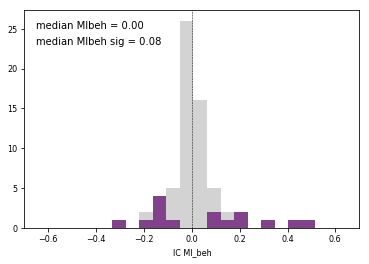

In [146]:
# histogram of MIbeh = MIpup0beh-MIpup0beh0 MI for behavior channel with pupil 
# shuffled corrected

median_d309_MI_beh_only=d309_MI_beh_only['MI_beh_only'].median()
print(median_d309_MI_beh_only)

median_d309_MI_beh_only_sig = d309_MI_beh_only_sig['MI_beh_only'].median()
print(median_d309_MI_beh_only_sig)

dist309_MI_beh_only = sns.distplot(d309_MI_beh_only['MI_beh_only'], 
                       hist_kws= {'alpha':1, 'color': 'lightgrey'}, kde=False, bins=15)

dist309_MI_beh_only_sig = sns.distplot(d309_MI_beh_only_sig['MI_beh_only'], 
                           hist_kws= {'alpha':1, 'color': color_ba}, kde=False, bins=15)

plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.xlim(-0.7, 0.7)

# change it so that the value of mean MI gets inserted not hard coded.
dist309_MI_beh_only.text(-0.65,25, "median MIbeh = 0.00", 
                         horizontalalignment='left', size='medium', color='k')
dist309_MI_beh_only.text(-0.65,23, "median MIbeh sig = 0.08", 
                         horizontalalignment='left', size='medium', color='k')

plt.xlabel('IC MI_beh')
plt.savefig("IC_MI_beh_dist.eps")

Now let's do the same for the plot of MI behavior unique  
`MIunique = MIpupbeh - MIpupbeh0`

In [41]:
# full model
d_pb309_full = d_pb309[d_pb309['state_sig']=='st.pup.beh']

# partial model behavior shuffled
d_pb0309 = d_pb309[d_pb309['state_sig']=='st.pup.beh0']
d_pb0309.head()

,cellid,modelname,state_sig,state_chan,MI,r,r_se,d,g,R2
396,ley046g-23-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,baseline,NaN,0.749305,0.027395,3.188048,0.977849,0.561457
397,ley046g-23-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,pupil,0.005258,0.749305,0.027395,-0.008825,-0.023951,0.561457
398,ley046g-23-1,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,active,0.003330,0.749305,0.027395,0.021796,0.025600,0.561457
399,ley046g-31-2,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,baseline,NaN,0.344880,0.027824,3.248334,0.998405,0.118942
400,ley046g-31-2,psth.fs20.pup-ld-st.pup.beh0-ref-psthfr.s_stat...,st.pup.beh0,pupil,0.056121,0.344880,0.027824,0.163677,0.113394,0.118942


In [42]:
# pivot the full model to have MI for each state_chan
d_pb309_MI = d_pb309_full.pivot(index='cellid', columns='state_chan', values='MI')

#drop pupil and baseline columns
d_pb309_MI = d_pb309_MI.drop(["baseline", "pupil"], axis=1)

# pivot the partial model dataframe
d_pb0309_MI = d_pb0309.pivot(index='cellid', columns='state_chan', values='MI')

#drop pupil and baseline columns
d_pb0309_MI = d_pb0309_MI.drop(["baseline", "pupil"], axis=1)

#change name of column to prepare for merging
d_pb0309_MI = d_pb0309_MI.rename(index=str, columns={"active":"active0"})

In [43]:
#reset index to get rid of multindexing in the full model
d_pb309_MI = d_pb309_MI.reset_index()
d_pb309_MI.head()

state_chan,cellid,active
0,BRT005c-a1,0.043999
1,BRT006d-a1,-0.018799
2,BRT006d-a2,0.006582
3,BRT007c-a1,0.125479
4,BRT007c-a3,0.017748


In [44]:
#reset index to get rid of multindexing in the partial model
d_pb0309_MI = d_pb0309_MI.reset_index()
d_pb0309_MI.head()

state_chan,cellid,active0
0,BRT005c-a1,-0.002725
1,BRT006d-a1,-0.000323
2,BRT006d-a2,0.002525
3,BRT007c-a1,0.077127
4,BRT007c-a3,-0.002990


In [45]:
# join dataframes
d309_MI_beh_unique = pd.merge(d_pb309_MI, d_pb0309_MI, how='left', on='cellid')

# add column called beh_only with difference between active and active0
d309_MI_beh_unique['MI_beh_unique']=d309_MI_beh_unique['active']-d309_MI_beh_unique['active0']

# set the index back to cellid to apply the loc method and get the significant cells
d309_MI_beh_unique=d309_MI_beh_unique.set_index('cellid')
d309_MI_beh_unique.head()

state_chan,active,active0,MI_beh_unique
cellid,,,
BRT005c-a1,0.043999,-0.002725,0.046724
BRT006d-a1,-0.018799,-0.000323,-0.018476
BRT006d-a2,0.006582,0.002525,0.004057
BRT007c-a1,0.125479,0.077127,0.048352
BRT007c-a3,0.017748,-0.002990,0.020738


In [46]:
# On the data frame pivoted on MI, apply the sign cells mask, and voila!
d309_MI_beh_unique_sig = d309_MI_beh_unique.loc[cellid_sig_309]

-0.0066722707632466145
0.037633181715249986


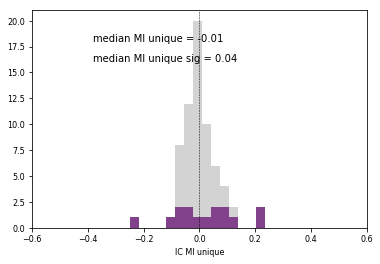

In [161]:
# histogram of MIbeh_unique = MIpupbeh - MIpupbeh0, MI for behavior only component

median_d309_MI_beh_unique = d309_MI_beh_unique['MI_beh_unique'].median()
print(median_d309_MI_beh_unique)

median_d309_MI_beh_unique_sig = d309_MI_beh_unique_sig['MI_beh_unique'].median()
print(median_d309_MI_beh_unique_sig)

dist309_MI_beh_unique = sns.distplot(d309_MI_beh_unique['MI_beh_unique'], 
                                  hist_kws= {'alpha':1, 'color': 'lightgrey'}, 
                                     kde=False, bins=15)

dist309_MI_beh_unique_sig = sns.distplot(d309_MI_beh_unique_sig['MI_beh_unique'], 
                                      hist_kws= {'alpha':1, 'color': color_ba}, 
                                         kde=False, bins=15)

plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.xlim(-0.6,0.6)

# change it so that the value of mean MI gets inserted not hard coded.
dist309_MI_beh_unique.text(-0.38,18, "median MI unique = -0.01", 
                        horizontalalignment='left', size='medium', color='k')
dist309_MI_beh_unique.text(-0.38,16, "median MI unique sig = 0.04", 
                        horizontalalignment='left', size='medium', color='k')

plt.xlabel('IC MI unique')

plt.savefig("IC_MI_beh_unique_dist.eps")

### Scatter plot of MIbeh (MIpup0beh - MIpup0beh0) vs MIbeh unique (= MIpupbeh - MIpupbeh0)

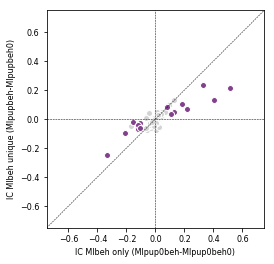

In [48]:
fig, ax = plt.subplots()

# plot
ax.scatter(d309_MI_beh_only['MI_beh_only'], d309_MI_beh_unique['MI_beh_unique'], 
           color='lightgrey', edgecolors='white')

ax.scatter(d309_MI_beh_only_sig['MI_beh_only'], d309_MI_beh_unique_sig['MI_beh_unique'], 
           color=color_ba, edgecolors='white')

ax.set_xlabel('IC MIbeh only (MIpup0beh-MIpup0beh0)')
ax.set_ylabel('IC MIbeh unique (MIpupbeh-MIpupbeh0)')
ax.set_aspect('equal')

# set the limits
plt.ylim(-0.75, 0.75)
plt.xlim(-0.75, 0.75)

# need a slope and c to fix the position of line
slope = 1
c = -.75

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
ax.set_xlim([x_min, x_max])

# add horizontal line
slope = 0
c = 0

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
ax.set_xlim([x_min, x_max])

# add vertical line
xposition = 0.00
plt.axvline(x=xposition, color='k', linestyle='--', linewidth=0.5)

plt.savefig("IC_MIbeh_scatterplot.pdf")

### IC Scatter plot of R2beh (R2pup0beh - R2pup0beh0) vs R2beh unique (R2pupbeh - R2pupbeh0)

In [49]:
# pivot the partial model to have R2 for each state_chan
d_p0b309_R2 = d_p0b309.pivot(index='cellid', columns='state_chan', values='R2')

#drop pupil and baseline columns
d_p0b309_R2 = d_p0b309_R2.drop(["baseline", "pupil"], axis=1)

# pivot the null model dataframe
d_p0b0309_R2 = d_p0b0309.pivot(index='cellid', columns='state_chan', values='R2')

#drop pupil and baseline columns
d_p0b0309_R2 = d_p0b0309_R2.drop(["baseline", "pupil"], axis=1)

#change name of column to prepare for merging
d_p0b0309_R2 = d_p0b0309_R2.rename(index=str, columns={"active":"active0"})

In [50]:
# pivot the full model to have R2 for each state_chan
d_pb309_R2 = d_pb309_full.pivot(index='cellid', columns='state_chan', values='R2')

#drop pupil and baseline columns
d_pb309_R2 = d_pb309_R2.drop(["baseline", "pupil"], axis=1)

# pivot the partial model dataframe
d_pb0309_R2 = d_pb0309.pivot(index='cellid', columns='state_chan', values='R2')

#drop pupil and baseline columns
d_pb0309_R2 = d_pb0309_R2.drop(["baseline", "pupil"], axis=1)

#change name of column to prepare for merging
d_pb0309_R2 = d_pb0309_R2.rename(index=str, columns={"active":"active0"})

In [51]:
#reset index to get rid of multindexing in the partial model
d_p0b309_R2 = d_p0b309_R2.reset_index()

#reset index to get rid of multindexing in the null model
d_p0b0309_R2 = d_p0b0309_R2.reset_index()

#reset index to get rid of multindexing in the full model
d_pb309_R2 = d_pb309_R2.reset_index()

#reset index to get rid of multindexing in the partial model
d_pb0309_R2 = d_pb0309_R2.reset_index()
d_pb0309_R2.head()

state_chan,cellid,active0
0,BRT005c-a1,0.146136
1,BRT006d-a1,0.094035
2,BRT006d-a2,0.362070
3,BRT007c-a1,0.383271
4,BRT007c-a3,0.401553


In [52]:
# join partial and null dataframes
d309_R2_beh_only = pd.merge(d_p0b309_R2, d_p0b0309_R2, how='left', on='cellid')

# add column called beh_only with difference between active and active0
d309_R2_beh_only['R2_beh_only']=d309_R2_beh_only['active']-d309_R2_beh_only['active0']

# set the index back to cellid to apply the loc method and get the significant cells
d309_R2_beh_only=d309_R2_beh_only.set_index('cellid')


# join full and partial dataframes
d309_R2_beh_unique = pd.merge(d_pb309_R2, d_pb0309_R2, how='left', on='cellid')

# add column called beh_only with difference between active and active0
d309_R2_beh_unique['R2_beh_unique']=d309_R2_beh_unique['active']-d309_R2_beh_unique['active0']

# set the index back to cellid to apply the loc method and get the significant cells
d309_R2_beh_unique=d309_R2_beh_unique.set_index('cellid')


In [53]:
# On the data frame pivoted on MI, apply the sign cells mask, and voila!
d309_R2_beh_only_sig = d309_R2_beh_only.loc[cellid_sig_309]

# On the data frame pivoted on MI, apply the sign cells mask, and voila!
d309_R2_beh_unique_sig = d309_R2_beh_unique.loc[cellid_sig_309]

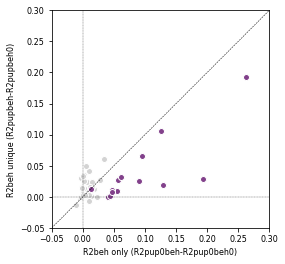

In [104]:
fig, ax = plt.subplots()

plt.ylim(-0.05, 0.3)
plt.xlim(-0.05, 0.3)

plt.axhline(0, linestyle='--', linewidth=0.3, color='k')
plt.axvline(0, linestyle='--', linewidth=0.3, color='k')
plt.plot([-0.05,0.3],[-0.05, 0.3], linestyle='--',linewidth=0.5, color='k')

ax.scatter(d309_R2_beh_only['R2_beh_only'], d309_R2_beh_unique['R2_beh_unique'], 
           color='lightgrey', edgecolors='white')

ax.scatter(d309_R2_beh_only_sig['R2_beh_only'], d309_R2_beh_unique_sig['R2_beh_unique'], 
           color=color_ba, edgecolors='white')

ax.set_xlabel('R2beh only (R2pup0beh-R2pup0beh0)')
ax.set_ylabel('R2beh unique (R2pupbeh-R2pupbeh0)')
ax.set_aspect('equal')

plt.savefig("IC_R2beh_scatterplot.pdf")

In [55]:
len(cellid_sig_309)

15

## Passive analysis AC

In [56]:
# A1 SUA+MUA: pup vs. passive 307 per state dataframe
d_pp307 = pd.read_csv('d_pp_307_new.csv')
d_pp307 = d_pp307.drop(['Unnamed: 0'], axis=1)

In [57]:
# Add column with R2 for variance analysis
d_pp307['R2'] = d_pp307['r']**2
d_pp307.head()

,cellid,modelname,state_sig,state_chan,MI,r,r_se,d,g,state_chan_alt,R2
0,BRT026c-20-1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,baseline,NaN,0.864991,0.006302,0.107560,0.999835,baseline,0.748209
1,BRT026c-20-1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,pupil,-0.001375,0.864991,0.006302,-0.001675,0.012811,pupil,0.748209
2,BRT026c-20-1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_BRT026c09_p_PTD,0.001041,0.864991,0.006302,0.008327,-0.003084,PASSIVE_1,0.748209
3,BRT026c-11-2,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,baseline,NaN,0.469461,0.087717,0.046025,1.006411,baseline,0.220394
4,BRT026c-11-2,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,pupil,0.022389,0.469461,0.087717,-0.002739,-0.088492,pupil,0.220394


In [ ]:
# Check out an example
d_pp307.loc[d_pp307['cellid']=='BRT037b-63-1']

In [63]:
# isolate rows that have PASSIVE_1 as state_chan_alt == comparison between first passive and first postpassive
d_pp307_p1 = d_pp307[d_pp307['state_chan_alt']=='PASSIVE_1']

# note that not all units have prepassive, so the number of unique cellid should drop between the two dfs
print(d_pp307['cellid'].nunique())
print(d_pp307_p1['cellid'].nunique())

126
104


In [79]:
# Find A1 units for which the model prediction with passive pre vs pass1 as state variable 
# signifantly predicts passive modulation
# significant cells = r_pup0_pass - r_pup0_pas0 > rse_pup0_pas + rse_pup0_pas0 where 'r' is 
# Pearson's correlation

# Pivot the df such that you only have r or r_se as data and state_sig as columns
d_pp307_p1_pivot_r= d_pp307_p1.pivot(index='cellid',columns='state_sig',values='r')
d_pp307_p1_pivot_rse= d_pp307_p1.pivot(index='cellid',columns='state_sig',values='r_se')

# create a new column in d_pivot_r where you take the diff between r in pup0.pas and pup0.pas0
d_pp307_p1_pivot_r['r_diff']=d_pp307_p1_pivot_r['st.pup0.pas']-d_pp307_p1_pivot_r['st.pup0.pas0']

# create a new column in d_pivot_rse where you take the sum of r_se in pup0.pas and pup0.pas0
d_pp307_p1_pivot_rse['r_sum']=d_pp307_p1_pivot_rse['st.pup0.pas']+d_pp307_p1_pivot_rse['st.pup0.pas0']

# create a np array listing all sig cells to use as mask for original df
cellid_p1_sig_307 = d_pp307_p1_pivot_r[d_pp307_p1_pivot_r['r_diff']>d_pp307_p1_pivot_rse['r_sum']].index

In [67]:
# partial model pupil shuffled
d_p0p307_p1 = d_pp307_p1[d_pp307_p1['state_sig']=='st.pup0.pas']

# null model pupil and behavior shuffled
d_p0p0307_p1 = d_pp307_p1[d_pp307_p1['state_sig']=='st.pup0.pas0']
d_p0p0307_p1.head()

,cellid,modelname,state_sig,state_chan,MI,r,r_se,d,g,state_chan_alt,R2
2,BRT026c-20-1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_BRT026c09_p_PTD,0.001041,0.864991,0.006302,0.008327,-0.003084,PASSIVE_1,0.748209
7,BRT026c-02-1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_BRT026c09_p_PTD,-0.001180,0.467124,0.015910,-0.034235,-0.007630,PASSIVE_1,0.218205
38,BRT026c-17-1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_BRT026c09_p_PTD,-0.001769,0.429314,0.037957,0.014503,-0.045336,PASSIVE_1,0.184311
51,BRT026c-07-1,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_BRT026c09_p_PTD,-0.000581,0.470487,0.025456,-0.130159,-0.327896,PASSIVE_1,0.221358
54,BRT026c-05-2,psth.fs20.pup-ld-st.pup0.pas0-ref-pas-psthfr.s...,st.pup0.pas0,FILE_BRT026c09_p_PTD,-0.001727,0.446596,0.024190,-0.023375,0.082153,PASSIVE_1,0.199448


In [73]:
# full model
d_pp307_p1_full = d_pp307_p1[d_pp307_p1['state_sig']=='st.pup.pas']

# partial model behavior shuffled
d_pp0307_p1 = d_pp307_p1[d_pp307_p1['state_sig']=='st.pup.pas0']
d_pp0307_p1.head()

,cellid,modelname,state_sig,state_chan,MI,r,r_se,d,g,state_chan_alt,R2
922,BRT026c-20-1,psth.fs20.pup-ld-st.pup.pas0-ref-pas-psthfr.s_...,st.pup.pas0,FILE_BRT026c09_p_PTD,-0.115640,0.899458,0.006912,0.008338,0.039932,PASSIVE_1,0.809025
927,BRT026c-17-1,psth.fs20.pup-ld-st.pup.pas0-ref-pas-psthfr.s_...,st.pup.pas0,FILE_BRT026c09_p_PTD,-0.067779,0.476403,0.029052,0.023357,-0.028905,PASSIVE_1,0.226960
944,BRT026c-07-1,psth.fs20.pup-ld-st.pup.pas0-ref-pas-psthfr.s_...,st.pup.pas0,FILE_BRT026c09_p_PTD,-0.078872,0.500566,0.025690,-0.119052,-0.307618,PASSIVE_1,0.250567
947,BRT026c-05-2,psth.fs20.pup-ld-st.pup.pas0-ref-pas-psthfr.s_...,st.pup.pas0,FILE_BRT026c09_p_PTD,-0.089431,0.532471,0.019290,-0.025511,0.046104,PASSIVE_1,0.283526
954,BRT026c-02-1,psth.fs20.pup-ld-st.pup.pas0-ref-pas-psthfr.s_...,st.pup.pas0,FILE_BRT026c09_p_PTD,-0.050659,0.509477,0.016344,-0.028676,0.008929,PASSIVE_1,0.259567


In [74]:
# pivot the partial model to have MI for each state_chan_alt
d_p0p307_p1_MI = d_p0p307_p1.pivot(index='cellid', columns='state_chan_alt', values='MI')

# pivot the null model dataframe to have MI for each state_chan_alt
d_p0p0307_p1_MI = d_p0p0307_p1.pivot(index='cellid', columns='state_chan_alt', values='MI')

#change name of column to prepare for merging
d_p0p0307_p1_MI = d_p0p0307_p1_MI.rename(index=str, columns={"PASSIVE_1":"PASSIVE_1_0"})


# pivot the full model to have MI for each state_chan_alt
d_pp307_p1_MI = d_pp307_p1_full.pivot(index='cellid', columns='state_chan_alt', values='MI')

# pivot the partial model dataframe to have MI for each state_chan_alt
d_pp0307_p1_MI = d_pp0307_p1.pivot(index='cellid', columns='state_chan_alt', values='MI')

#change name of column to prepare for merging
d_pp0307_p1_MI = d_pp0307_p1_MI.rename(index=str, columns={"PASSIVE_1":"PASSIVE_1_0"})

In [75]:
#reset index to get rid of multindexing in the partial model
d_p0p307_p1_MI = d_p0p307_p1_MI.reset_index()

#reset index to get rid of multindexing in the null model
d_p0p0307_p1_MI = d_p0p0307_p1_MI.reset_index()


#reset index to get rid of multindexing in the partial model
d_pp0307_p1_MI = d_pp0307_p1_MI.reset_index()

#reset index to get rid of multindexing in the full model
d_pp307_p1_MI = d_pp307_p1_MI.reset_index()

In [76]:
# join partial p0p and null dataframes
d307_p1_MI_pas_only = pd.merge(d_p0p307_p1_MI, d_p0p0307_p1_MI, how='left', on='cellid')

# add column called beh_only with difference between active and active0
d307_p1_MI_pas_only['MI_pas_only']=d307_p1_MI_pas_only['PASSIVE_1']-d307_p1_MI_pas_only['PASSIVE_1_0']

# set the index back to cellid to apply the loc method and get the significant cells
d307_p1_MI_pas_only=d307_p1_MI_pas_only.set_index('cellid')
d307_p1_MI_pas_only.head()


# join full with partial pp0 dataframes
d307_p1_MI_pas_unique = pd.merge(d_pp307_p1_MI, d_pp0307_p1_MI, how='left', on='cellid')

# add column called beh_only with difference between active and active0
d307_p1_MI_pas_unique['MI_pas_unique']=d307_p1_MI_pas_unique['PASSIVE_1']-d307_p1_MI_pas_unique['PASSIVE_1_0']

# set the index back to cellid to apply the loc method and get the significant cells
d307_p1_MI_pas_unique=d307_p1_MI_pas_unique.set_index('cellid')

In [80]:
# On the data frame pivoted on MI, apply the sign cells mask, and voila!
d307_p1_MI_pas_only_sig = d307_p1_MI_pas_only.loc[cellid_p1_sig_307]

d307_p1_MI_pas_unique_sig = d307_p1_MI_pas_unique.loc[cellid_p1_sig_307]

0.010354952979505316
0.11863205125601908


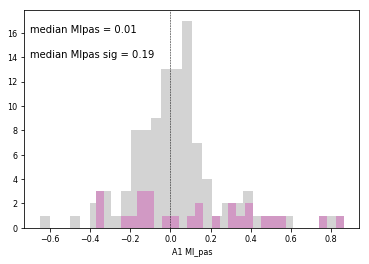

In [107]:
# histogram of MIpas_only = MIpup0pas-MIpup0pas0 MI for passive (pre vs pas1) channel with pupil shuffled
median_d307_p1_MI_pas_only=d307_p1_MI_pas_only['MI_pas_only'].median()
print(median_d307_p1_MI_pas_only)

median_d307_p1_MI_pas_only_sig = d307_p1_MI_pas_only_sig['MI_pas_only'].median()
print(median_d307_p1_MI_pas_only_sig)

dist307_p1_MI_pas_only = sns.distplot(d307_p1_MI_pas_only['MI_pas_only'], 
                       hist_kws= {'alpha':1, 'color': 'lightgrey'}, kde=False, bins=30)

dist307_p1_MI_pas_only_sig = sns.distplot(d307_p1_MI_pas_only_sig['MI_pas_only'], 
                           hist_kws= {'alpha':1, 'color': color_bpas}, kde=False, bins=30)

plt.axvline(0, linestyle='--', linewidth=0.5, color='k')

# change it so that the value of mean MI gets inserted not hard coded.
dist307_p1_MI_pas_only.text(-0.7,16, "median MIpas = 0.01", horizontalalignment='left', 
                         size='medium', color='k')
dist307_p1_MI_pas_only.text(-0.7,14, "median MIpas sig = 0.19", horizontalalignment='left', 
                         size='medium', color='k')

plt.xlabel('A1 MI_pas')
plt.savefig("A1_MI_pas_dist.pdf")

0.04693324086755771
0.07150637033411472


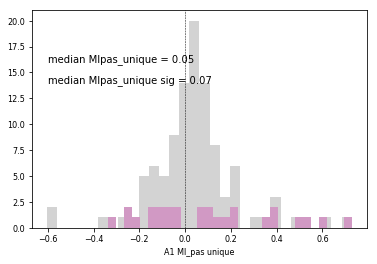

In [108]:
# histogram of MIpas_unique = MIpuppas-MIpuppas0 MI for passive (pre vs pas1) channel with pupil regressed out
median_d307_p1_MI_pas_unique=d307_p1_MI_pas_unique['MI_pas_unique'].median()
print(median_d307_p1_MI_pas_unique)

median_d307_p1_MI_pas_unique_sig = d307_p1_MI_pas_unique_sig['MI_pas_unique'].median()
print(median_d307_p1_MI_pas_unique_sig)

dist307_p1_MI_pas_unique = sns.distplot(d307_p1_MI_pas_unique['MI_pas_unique'], 
                       hist_kws= {'alpha':1, 'color': 'lightgrey'}, kde=False, bins=30)

dist307_p1_MI_pas_unique_sig = sns.distplot(d307_p1_MI_pas_unique_sig['MI_pas_unique'], 
                           hist_kws= {'alpha':1, 'color': color_bpas}, kde=False, bins=30)

plt.axvline(0, linestyle='--', linewidth=0.5, color='k')

# change it so that the value of mean MI gets inserted not hard coded.
dist307_p1_MI_pas_unique.text(-0.6,16, "median MIpas_unique = 0.05", horizontalalignment='left', 
                         size='medium', color='k')
dist307_p1_MI_pas_unique.text(-0.6,14, "median MIpas_unique sig = 0.07", horizontalalignment='left', 
                         size='medium', color='k')

plt.xlabel('A1 MI_pas unique')
plt.savefig("A1_MI_pas_unique_dist.pdf")

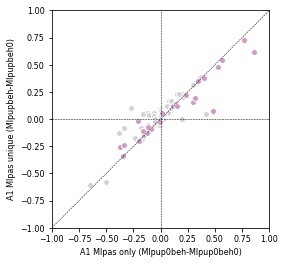

In [109]:
fig, ax = plt.subplots()

# plot
ax.scatter(d307_p1_MI_pas_only['MI_pas_only'], d307_p1_MI_pas_unique['MI_pas_unique'], 
           color='lightgrey', edgecolors='white')

ax.scatter(d307_p1_MI_pas_only_sig['MI_pas_only'], d307_p1_MI_pas_unique_sig['MI_pas_unique'], 
           color=color_bpas, edgecolors='white')

ax.set_xlabel('A1 MIpas only (MIpup0beh-MIpup0beh0)')
ax.set_ylabel('A1 MIpas unique (MIpupbeh-MIpupbeh0)')
ax.set_aspect('equal')

# set the limits
plt.ylim(-1, 1)
plt.xlim(-1, 1)

# need a slope and c to fix the position of line
slope = 1
c = -1

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
ax.set_xlim([x_min, x_max])

# add horizontal line
slope = 0
c = 0

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
ax.set_xlim([x_min, x_max])

# add vertical line
xposition = 0.00
plt.axvline(x=xposition, color='k', linestyle='--', linewidth=0.5)

plt.savefig("A1_MIpas_scatterplot.pdf")

Let's do the same for R2

In [99]:
# pivot the partial model to have R2 for each state_chan_alt
d_p0p307_p1_R2 = d_p0p307_p1.pivot(index='cellid', columns='state_chan_alt', values='R2')

# pivot the null model dataframe to have R2 for each state_chan_alt
d_p0p0307_p1_R2 = d_p0p0307_p1.pivot(index='cellid', columns='state_chan_alt', values='R2')

#change name of column to prepare for merging
d_p0p0307_p1_R2 = d_p0p0307_p1_R2.rename(index=str, columns={"PASSIVE_1":"PASSIVE_1_0"})


# pivot the full model to have R2 for each state_chan_alt
d_pp307_p1_R2 = d_pp307_p1_full.pivot(index='cellid', columns='state_chan_alt', values='R2')

# pivot the partial model dataframe to have R2 for each state_chan_alt
d_pp0307_p1_R2 = d_pp0307_p1.pivot(index='cellid', columns='state_chan_alt', values='R2')

#change name of column to prepare for merging
d_pp0307_p1_R2 = d_pp0307_p1_R2.rename(index=str, columns={"PASSIVE_1":"PASSIVE_1_0"})

In [100]:
#reset index to get rid of multindexing in the partial model
d_p0p307_p1_R2 = d_p0p307_p1_R2.reset_index()

#reset index to get rid of multindexing in the null model
d_p0p0307_p1_R2 = d_p0p0307_p1_R2.reset_index()


#reset index to get rid of multindexing in the partial model
d_pp0307_p1_R2 = d_pp0307_p1_R2.reset_index()

#reset index to get rid of multindexing in the full model
d_pp307_p1_R2 = d_pp307_p1_R2.reset_index()

In [101]:
# join partial p0p and null dataframes
d307_p1_R2_pas_only = pd.merge(d_p0p307_p1_R2, d_p0p0307_p1_R2, how='left', on='cellid')

# add column called beh_only with difference between active and active0
d307_p1_R2_pas_only['R2_pas_only']=d307_p1_R2_pas_only['PASSIVE_1']-d307_p1_R2_pas_only['PASSIVE_1_0']

# set the index back to cellid to apply the loc method and get the significant cells
d307_p1_R2_pas_only=d307_p1_R2_pas_only.set_index('cellid')
d307_p1_R2_pas_only.head()


# join full with partial pp0 dataframes
d307_p1_R2_pas_unique = pd.merge(d_pp307_p1_R2, d_pp0307_p1_R2, how='left', on='cellid')

# add column called beh_only with difference between active and active0
d307_p1_R2_pas_unique['R2_pas_unique']=d307_p1_R2_pas_unique['PASSIVE_1']-d307_p1_R2_pas_unique['PASSIVE_1_0']

# set the index back to cellid to apply the loc method and get the significant cells
d307_p1_R2_pas_unique=d307_p1_R2_pas_unique.set_index('cellid')


In [102]:
# On the data frame pivoted on R2, apply the sign cells mask, and voila!
d307_p1_R2_pas_only_sig = d307_p1_R2_pas_only.loc[cellid_p1_sig_307]

d307_p1_R2_pas_unique_sig = d307_p1_R2_pas_unique.loc[cellid_p1_sig_307]

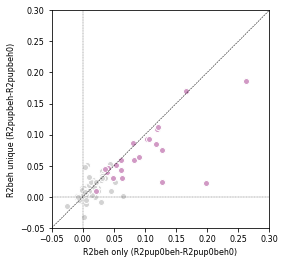

In [110]:
fig, ax = plt.subplots()

plt.ylim(-0.05, 0.3)
plt.xlim(-0.05, 0.3)

plt.axhline(0, linestyle='--', linewidth=0.3, color='k')
plt.axvline(0, linestyle='--', linewidth=0.3, color='k')
plt.plot([-0.05,0.3],[-0.05, 0.3], linestyle='--',linewidth=0.5, color='k')

ax.scatter(d307_p1_R2_pas_only['R2_pas_only'], d307_p1_R2_pas_unique['R2_pas_unique'], 
           color='lightgrey', edgecolors='white')

ax.scatter(d307_p1_R2_pas_only_sig['R2_pas_only'], d307_p1_R2_pas_unique_sig['R2_pas_unique'], 
           color=color_bpas, edgecolors='white')

ax.set_xlabel('R2beh only (R2pup0beh-R2pup0beh0)')
ax.set_ylabel('R2beh unique (R2pupbeh-R2pupbeh0)')
ax.set_aspect('equal')

plt.savefig("IC_R2beh_scatterplot.pdf")

In [ ]:
# Find A1 units for which the model prediction with behavior as state variable 
# signifantly predicts behavior modulation
# significant cells = r_pup0_beh - r_pup0_beh0 > rse_pup0_beh + rse_pup0_beh0 where 'r' is 
# Pearson's correlation

# Isolate df with only active (or any of those state_chan as r (Pearson's) is the same)
d_pb307_active = d_pb307[d_pb307['state_chan']=='active']

# Pivot the new df such that you only have r or r_se as data and state_sig as columns
d_pb307_pivot_r= d_pb307_active.pivot(index='cellid',columns='state_sig',values='r')
d_pb307_pivot_rse= d_pb307_active.pivot(index='cellid',columns='state_sig',values='r_se')

# create a new column in d_pivot_r where you take the diff between r in pup0.beh and pup0.beh0
d_pb307_pivot_r['r_diff']=d_pb307_pivot_r['st.pup0.beh']-d_pb307_pivot_r['st.pup0.beh0']

# create a new column in d_pivot_rse where you take the sum of r_se in pup0.beh and pup0.beh0
d_pb307_pivot_rse['r_sum']=d_pb307_pivot_rse['st.pup0.beh']+d_pb307_pivot_rse['st.pup0.beh0']

# create a np array listing all sig cells to use as mask for original df
cellid_sig_307 = d_pb307_pivot_r[d_pb307_pivot_r['r_diff']>d_pb307_pivot_rse['r_sum']].index

### c) AC 301 SUA results 

In [ ]:
# AC SUA: pup vs. beh 301 per state dataframe
d_pb301 = pd.read_csv('d_pb_per_state_301.csv')
d_pb301 = d_pb301.drop(['Unnamed: 0'], axis=1)

In [ ]:
# partial model pupil shuffled
d_p0b301 = d_pb301[d_pb301['state_sig']=='st.pup0.beh']

# full model
d_pb301_full = d_pb301[d_pb301['state_sig']=='st.pup.beh']

In [ ]:
# pivot the dataframe to have MI (predicted responses) for each state_chan
d_p0b301_MI = d_p0b301.pivot(index='cellid',columns='state_chan',values='MI')
d_pb301_full_MI = d_pb301_full.pivot(index='cellid',columns='state_chan',values='MI')
d_p0b301_MI.describe()

In [ ]:
# histogram of MI for behavior channel with pupil shuffled
mean_MI_p0b301=d_p0b301_MI['active'].mean()
print(mean_MI_p0b301)

median_MI_p0b301=d_p0b301_MI['active'].median()
print(median_MI_p0b301)

dist_MI = sns.distplot(d_p0b301_MI['active'], hist_kws= {'alpha':1, 'color': color_ba}, 
                       kde=False, bins=25)
plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
# change it so that the value of mean MI gets inserted not hard coded.
dist_MI.text(-0.6,12, "median MI = 0.06", horizontalalignment='left', size='medium',
            color='k')
plt.xlabel('A1 Task MI SUA (pupil shuffled)')

## 2) Do we see similar modulation effect for passive vs. other passives (ignoring pupil) in AC and IC? 

### a) A1 307 MUA + SUA results 

In [ ]:
# AC SUA+MUA: pup vs. file position 307 per state dataframe
d_pf307 = pd.read_csv('d_pf_per_state_307.csv')
d_pf307 = d_pf307.drop(['Unnamed: 0'], axis=1)

In [ ]:
# full model
d_pf307_full = d_pf307[d_pf307['state_sig']=='st.pup.fil']
d_pf307_full.head()

Stacked bar chart for each cell. Plot a bar broken up into 4 colors showing the relative performance of the null model (r_pup0.beh0), unique pupil (r_pup.beh-r_pup0.beh), unique behavior (r_pup.beh-r_pup.beh0) and ambiguous pupil or behavior (r_pup0.beh + r_pup.beh0 - r_pup.beh - r_pup0.beh0 -- I think the math works out for this last one).

In [ ]:
# function to create a list of color names based on significant state variable effect 
# in A1 cells
def pltcolor(lst,state):
    colors=[]
    for val in lst:
        if val==0:
            colors.append('lightgrey')
        elif val==1 and state=='pas':
            colors.append('#D199C4')
        elif val==1 and state=='pup':
            colors.append('#2E7E3E')
    return colors

In [ ]:
# Create three dataframes uniquely for each model
d_pup0_pas10=d_pup_pas1[d_pup_pas1['state_sig0']=='st.pup0.pas0']
d_pup0_pas1=d_pup_pas1[d_pup_pas1['state_sig0']=='st.pup0.pas']
d_pup_pas10=d_pup_pas1[d_pup_pas1['state_sig0']=='st.pup.pas0']

# gotta reset the inexes to that it does not complain in the next cell when I try
# to subtract two rows from two different data frame. I could have also merge these three 
# into one, but I'm lazy
d_pup0_pas10=d_pup0_pas10.reset_index(drop=True)
d_pup0_pas1=d_pup0_pas1.reset_index(drop=True)
d_pup_pas10=d_pup_pas10.reset_index(drop=True)

In [ ]:
# histogram of gains for behavior channel with pupil shuffled
color = '#D199C4'
g = sns.distplot(d_pup0_pas1['g'], hist_kws= {'alpha':1, 'color': color}, kde=False)
plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.xlabel('pre-post1 passive gain (pupil shuffled)')
plt.ylabel('count')

In [ ]:
# histogram of gains for behavior channel with pupil shuffled baseline substracted?
color = '#D199C4'
g = sns.distplot(d_pup0_pas1['g']-d_pup0_pas1['d'], hist_kws= {'alpha':1, 'color': color}, kde=False)
plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.xlabel('pre-post1 passive gain (pupil shuffled)')
plt.ylabel('count')

In [ ]:
# Plotting passive block ignoring pupil versus passive block regressing out pupil
# x-axis improvement from passive block ignoring pupil:  r_pup0_pas1 - r_pup0_pas10
# y-axis improvement regressing out (or accounting for) pupil: r_pup_pas1 - r_pup_pas10

# Create the colors list using the function pltcolor
colors=pltcolor(d_pup_pas1['sig_var'],'pas')

fig, ax = plt.subplots()

# set the limits
plt.ylim(-0.05, 0.2)
plt.xlim(-0.05, 0.2)

# draw horizontal lines and unitary line
plt.axhline(0, linestyle='--', linewidth=0.5, color='k')
plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.plot([-0.05,0.2],[-0.05, 0.2], linestyle='--',linewidth=0.5, color='k')

# note that d_pup0_beh['r'] is the same as d_pup_beh0['r'] and d_pup0_beh0['r']
ax.scatter(d_pup0_pas1['r0']-d_pup0_pas10['r0'],d_pup_pas10['r']-d_pup_pas10['r0'], 
           color=colors, edgecolors='white')
ax.set_xlabel('Passive1 block (ignore pupil)')
ax.set_ylabel('Passive1 block (account for pupil)')
ax.set_aspect('equal')


### 3) What is the contribution of pupil to behavioral effects?

In [ ]:
# pup vs. active/passive
batch = 307  # A1 SUA and MUA
state_list = ['st.pup0.beh0','st.pup0.beh','st.pup.beh0','st.pup.beh']
basemodel = "-ref-psthfr.s_stategain.S"

#d_pup_beh = get_model_results(batch=batch, state_list=state_list, basemodel=basemodel)
d_pup_beh = pd.read_csv('d_pup_beh.csv')

In [ ]:
# to look at unique variance explained we need to square r and r0 and then take the difference
# create three new colums R2 R02 and delta_R2
d_pup_beh['R2']=d_pup_beh['r']**2
d_pup_beh['R02']=d_pup_beh['r0']**2
d_pup_beh['R2_unique']=d_pup_beh['R2']-d_pup_beh['R02']

# Also I want to delete that first Unnamed column because it's useless
d_pup_beh = d_pup_beh.drop(['Unnamed: 0'], axis=1)

In [ ]:
# add column to specify if cellid has significant effect of any state variable 
# (specific to baseline row)
d_pup_beh['sig_var']=np.where(d_pup_beh['r_unique']>2*d_pup_beh['r_se'], 1, 0)

# next is an unelegant trick to get the values in raws that are not 'baseline' off the equation
mask = d_pup_beh.state_chan != 'baseline'
column = 'sig_var'
d_pup_beh.loc[mask, column] = '-'

d_pup_beh.head(10)

In [ ]:
# function to create a list of color names based on significant state variable effect 
# in A1 cells
def pltcolor(lst,state):
    colors=[]
    for val in lst:
        if val==0:
            colors.append('lightgrey')
        elif val==1 and state=='beh':
            colors.append('#82418B')
        elif val==1 and state=='pup':
            colors.append('#2E7E3E')
    return colors

In [ ]:
# Create three dataframes uniquely for each model
d_pup0_beh0=d_pup_beh[d_pup_beh['state_chan']=='baseline']
d_pup0_beh=d_pup_beh[d_pup_beh['state_chan']=='pupil']
d_pup_beh0=d_pup_beh[d_pup_beh['state_chan']=='active']

# gotta reset the inexes to that it does not complain in the next cell when I try
# to subtract two rows from two different data frame. I could have also merge these three 
# into one, but I'm lazy
d_pup0_beh0=d_pup0_beh0.reset_index(drop=True)
d_pup0_beh=d_pup0_beh.reset_index(drop=True)
d_pup_beh0=d_pup_beh0.reset_index(drop=True)

In [ ]:
mean_g_beh=d_pup0_beh['g'].mean()
std_g_beh=d_pup0_beh['g'].std()
print(mean_g_beh)
print(std_g_beh)

mean_g_pas1=d_pup0_pas1['g'].mean()
std_g_pas1=d_pup0_pas1['g'].std()
print(mean_g_pas1)
print(std_g_pas1)

In [ ]:
# histogram of gains for behavior channel with pupil shuffled
color = '#82418B'
g = sns.distplot(d_pup0_beh['g'], hist_kws= {'alpha':1, 'color': color}, kde=False)
plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.xlabel('behavior gain (pupil shuffled)')
plt.ylabel('count')

g = sns.distplot(d_pup0_pas1['g'], color=color, kde=False)
plt.axvline(0, linestyle='--', linewidth=0.5, color='k')

Do the same 

In [ ]:
# histogram of gains for pupil channel with behavior shuffled
color='#2E7E3E'
sns.distplot(d_pup_beh0['g'], hist_kws= {'alpha':1, 'color': color}, kde=False)
plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.xlabel('pupil gain (behavior shuffled)')
plt.ylabel('count')

In [ ]:
# Plotting behavior ignoring pupil versus behavior regressing out pupil
# x-axis improvement from behavior ignoring pupil:  r_pup0_beh - r_pup0_beh0
# y-axis improvement regressing out (or accounting for) pupil: r_pup_beh - r_pup_beh0

# Create the colors list using the function pltcolor
colors=pltcolor(d_pup_beh['sig_var'],'beh')

fig, ax = plt.subplots()

# set the limits
plt.ylim(-0.05, 0.2)
plt.xlim(-0.05, 0.2)

# draw horizontal lines and unitary line
plt.axhline(0, linestyle='--', linewidth=0.5, color='k')
plt.axvline(0, linestyle='--', linewidth=0.5, color='k')
plt.plot([-0.05,0.2],[-0.05, 0.2], linestyle='--',linewidth=0.5, color='k')

# note that d_pup0_beh['r'] is the same as d_pup_beh0['r'] and d_pup0_beh0['r']
ax.scatter(d_pup0_beh['r0']-d_pup0_beh0['r0'],d_pup_beh0['r']-d_pup_beh0['r0'], 
           color=colors, edgecolors='white')
ax.set_xlabel('Behavior (ignore pupil)')
ax.set_ylabel('Behavior (account for pupil)')
ax.set_aspect('equal')


**Questions to be answered**
* How many of these are SUA versus MUA?
* Can we tell if those cells above the unitary lines have negative r_unique for pupil or negative full model r? MI?


In [ ]:
# Plot unique contribution of pupil in terms of MI. 
# x axis is MI for a variable behavior  if you ignore the existence of pupil
# y axis is MI_unique for behavior, MI behavior after regressing out pupil

# d_pup_beh0['MI] is the MI calculated from the full model for active and passive behavior
# d_pup0_beh['MI'] is the MI calculated from the full model for large and small pupil

fig, ax = plt.subplots()

ax.scatter(d_pup_beh0['MI'], d_pup_beh0['MI_unique'], color=colors, edgecolors='white')
ax.set_xlabel('MI active (ignore pupil)')
ax.set_ylabel('MI_unique active (regress out pupil)')
ax.set_aspect('equal')

# set the limits
plt.ylim(-1, 1)
plt.xlim(-1, 1)

# need a slope and c to fix the position of line
slope = 1
c = -1

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
ax.set_xlim([x_min, x_max])


# add horizontal line
slope = 0
c = 0

x_min, x_max = ax.get_xlim()
y_min, y_max = c, c + slope*(x_max-x_min)
ax.plot([x_min, x_max], [y_min, y_max], linewidth=0.5, linestyle='--', color='k')
ax.set_xlim([x_min, x_max])

# add vertical line
xposition = 0.00
plt.axvline(x=xposition, color='k', linestyle='--', linewidth=0.5)

Stacked bar char: for each cell plot a bar broken up into 4 colors showing the relative performance of the null model (r_pup0.beh0), unique pupil (r_pup.beh-r_pup0.beh), unique behavior (r_pup.beh-r_pup.beh0) and ambiguous pupil or behavior (r_pup0.beh + r_pup.beh0 - r_pup.beh - r_pup0.beh0 -- I think the math works out for this last one).

In [ ]:

r_null = d_pup0_beh0['r0']
r_null = d_pup0_beh0['r0']

r_pup_uniq = d_pup_beh0['r']-d_pup0_beh['r0']
r_pup_uniq = d_pup_beh0['r']-d_pup0_beh['r0']

r_beh_uniq = d_pup_beh0['r']-d_pup_beh0['r0']
r_beh_uniq = d_pup_beh0['r']-d_pup_beh0['r0']






fig, ax = plt.subplots()
#r_ambig = 

N=3
ind = np.arange(N) # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, means, width, yerr=r_null_std)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)


In [ ]:
# pup vs. per file
state_list = ['st.pup0.fil0','st.pup0.fil','st.pup.fil0','st.pup.fil']
basemodel = "-ref-psthfr.s_stategain.S"
#d_pup_fil = get_model_results(batch=batch, state_list=state_list, basemodel=basemodel)
d_pup_fil = pd.read_csv('d_pup_fil.csv')

In [ ]:
d_pup_fil.head(10)

In [ ]:
# really bad way of deleting raws with passive comparisons that are not pre-post1
def just_the_first_passive(df):
    '''Returns a new dataframe with all the rows in df, except
    rows that are not the first passive. '''
    rows=[]
    cells_with_one_pup_pas = set()
    baseline = None
    pupil = None
    passive = None
    for _, row in df.iterrows():
        if (row['cellid'] in cells_with_one_pup_pas0):
            continue
        
        if (row['state_chan'] == 'baseline'):
            baseline = row
        if (row['state_chan'] == 'pupil'):
            pupil = row 
        if (row['state_sig0'] == 'st.pup.pas0'):
            passive = row
        
        if (baseline is not None and pupil is not None and passive is not None) and\
           (baseline['cellid'] == pupil['cellid']) and\
           (baseline['cellid'] == passive['cellid']):
            rows.append(baseline)
            rows.append(pupil)
            rows.append(passive)
            cells_with_one_pup_pas0.add(pupil['cellid'])
            baseline = None
            pupil = None
            passive = None

    return pd.DataFrame(rows)